2023.04.10 박진윤 선임연구원, 태안군 인공지능유합산업진흥원

## Visualize MSR Action 3D public dataset

In [1]:
dataset_name = 'MSRA'

In [19]:
ori_dir = f'./dataset/MSR_Action_3D/'
prcs_dir = f'./dataset/preprocess/{dataset_name}/'

## Library import

In [3]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import os
import natsort
import imageio
import cv2
import glob
import io

# %matplotlib notebook

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8g226waf because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
def createFolder(directory):
    try:
        if os.path.exists(directory):
            print('Already Exists')
        if not os.path.exists(directory):
            os.makedirs(directory)
            print('Sucess creating directory. -> ' + directory)
    except OSError:
        print ('Error: Creating directory.' +  directory)

## Assert data information
- 데이터 인텍스별로 해당되는 관절 인덱트
- motion class 이름 및 인덱스

In [5]:
bones_3d = [[19, 2, 2],
            [2, 3, 2],
            [3, 6, 2],
            [2, 1, 0],
            [1, 8, 0],
            [8, 10, 0],
            [10, 12, 0],
            [2, 0, 1],
            [0, 7, 1],
            [7, 9, 1],
            [9, 11, 1],
            [6, 5, 0],
            [5, 14, 0],
            [14, 16, 0],
            [16, 18, 0],
            [6, 4, 1],
           [4, 13, 1],
           [13, 15, 1],
           [15, 17, 1]] #0 == red/right, 1 == blue/left 2 == black/mid

In [6]:
activity = [[0, 'high_arm_wave'],
           [1,'horizontal_arm_wave'],
           [2, 'hammer'],
           [3, 'hand_catch'],
           [4, 'forward_punch'],
           [5, 'high_throw'],
           [6, 'draw_x'],
           [7, 'draw_tick'],
           [8, 'draw_circle'],
           [9, 'hand_clap'],
           [10, 'two_hand_wave'],
           [11, 'side_boxing'],
           [12, 'bend'],
           [13, 'foward_kick'],
           [14, 'side_kick'],
           [15, 'jogging'],
           [16, 'tennis_swing'],
           [17, 'tennis_serve'],
           [18, 'golf_swing'],
           [19, 'pick_up_throw']]

## Check data format

In [7]:
#전체 파일 리스트 확인하기
file_list = natsort.natsorted(glob.glob(ori_dir + '*.txt'))
len(file_list), file_list[0]

(567, './dataset/MSR_Action_3D/a01_s01_e01_skeleton3D.txt')

motion class 별로 몇개의 파일이 있는지 확인

In [8]:
# checking the total sample/video data for each activity
for act in activity:
    act_cnt = 0
    for file in file_list:
        action = file.split('/')[-1].split('_')[0][1:]
        if act[0]+1 == int(action):
            act_cnt+=1
    print(f'{act[1]} : {act_cnt}')

high_arm_wave : 27
horizontal_arm_wave : 27
hammer : 27
hand_catch : 26
forward_punch : 26
high_throw : 26
draw_x : 28
draw_tick : 30
draw_circle : 30
hand_clap : 30
two_hand_wave : 30
side_boxing : 30
bend : 30
foward_kick : 30
side_kick : 20
jogging : 30
tennis_swing : 30
tennis_serve : 30
golf_swing : 30
pick_up_throw : 30


데이터 구조 확인

In [9]:
# checking one example
# loading the original MSR data
data = np.loadtxt(file_list[0])
ins = data.reshape((data.shape[0]//20, 20, 4))
len(ins[0]), ins[0]

(20,
 array([[-3.717360e-01,  3.710310e-01,  2.674849e+00,  1.000000e+00],
        [-1.409500e-02,  3.553410e-01,  2.678124e+00,  1.000000e+00],
        [-1.900550e-01,  4.086530e-01,  2.581967e+00,  0.000000e+00],
        [-2.006130e-01,  2.079940e-01,  2.773580e+00,  0.000000e+00],
        [-3.357550e-01, -1.358800e-02,  2.642459e+00,  1.000000e+00],
        [-5.481000e-02, -1.700800e-02,  2.629821e+00,  9.711540e-01],
        [-1.895010e-01,  2.549000e-03,  2.759828e+00,  0.000000e+00],
        [-4.323160e-01,  1.096410e-01,  2.668247e+00,  1.000000e+00],
        [ 3.457800e-02,  9.143100e-02,  2.682739e+00,  1.000000e+00],
        [-4.071580e-01, -1.748000e-01,  2.618515e+00,  1.000000e+00],
        [ 1.806800e-02, -1.900940e-01,  2.615780e+00,  1.000000e+00],
        [-4.106280e-01, -2.420260e-01,  2.629925e+00,  4.591350e-01],
        [ 1.574700e-02, -2.581550e-01,  2.610892e+00,  7.451920e-01],
        [-3.100580e-01, -5.862040e-01,  2.703399e+00,  1.000000e+00],
        [-6.720

시각화를 통해 기존의 데이터 확인

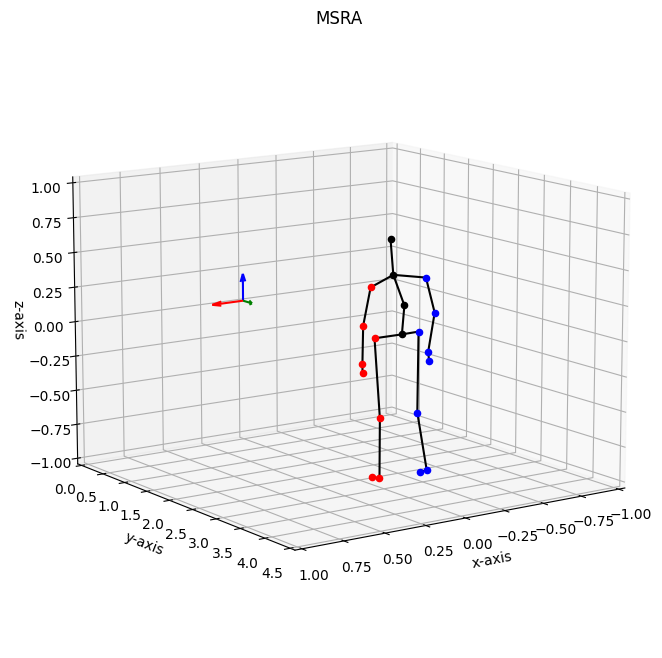

In [14]:
##viewing just one frame each

# %matplotlib notebook

frame_idx = 0
plt.ioff()
fig = plt.figure(figsize=(8,8))

elev= 12
azim = 55

ax = fig.add_subplot(projection='3d')
ax.view_init(elev,azim) #(elev = 위아래, azim = 좌우)
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([0, 4.5])
ax.set_zlim3d([-1, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

for bone in bones_3d:
    start = bone[0]
    end = bone[1]

    col = 'black' if bone[2] == 0 else 'black' #red = right, black = left

    x = [(ins[frame_idx][start][0]), (ins[frame_idx][end][0])]
    y = [(ins[frame_idx][start][2]), (ins[frame_idx][end][2])]
    z = [(ins[frame_idx][start][1]), (ins[frame_idx][end][1])]

    ax.plot(x, y, z, c = col)

for i in range(len(ins[frame_idx])):
    if i in [0,4,7,9,11,13,15,17]: col = 'blue'
    elif i in [19,2,3,6]: col = 'black'
    else: col = 'red'
    x = ins[frame_idx][i][0]
    y = ins[frame_idx][i][2]
    z = ins[frame_idx][i][1]

    ax.scatter3D(x, y, z, c = col) 

plt.title(dataset_name)
plt.show()

MSRA dataset in from of x, z, y order

## Rearrange data format
- 제공되는 데이터셋의 구조를 재설정
-  motion class에 따라 폴더별로 파일 저장

In [15]:
for i in activity:
    createFolder(prcs_dir + '{}'.format(i[1]))

Sucess creating directory. -> ./dataset/proprocess/MSRA/high_arm_wave
Sucess creating directory. -> ./dataset/proprocess/MSRA/horizontal_arm_wave
Sucess creating directory. -> ./dataset/proprocess/MSRA/hammer
Sucess creating directory. -> ./dataset/proprocess/MSRA/hand_catch
Sucess creating directory. -> ./dataset/proprocess/MSRA/forward_punch
Sucess creating directory. -> ./dataset/proprocess/MSRA/high_throw
Sucess creating directory. -> ./dataset/proprocess/MSRA/draw_x
Sucess creating directory. -> ./dataset/proprocess/MSRA/draw_tick
Sucess creating directory. -> ./dataset/proprocess/MSRA/draw_circle
Sucess creating directory. -> ./dataset/proprocess/MSRA/hand_clap
Sucess creating directory. -> ./dataset/proprocess/MSRA/two_hand_wave
Sucess creating directory. -> ./dataset/proprocess/MSRA/side_boxing
Sucess creating directory. -> ./dataset/proprocess/MSRA/bend
Sucess creating directory. -> ./dataset/proprocess/MSRA/foward_kick
Sucess creating directory. -> ./dataset/proprocess/MSRA/s

In [16]:
file_list[0]

'./dataset/MSR_Action_3D/a01_s01_e01_skeleton3D.txt'

In [17]:
#rewriting the data with unified format
for file_name in file_list:
    print(file_name)
    #load file
    data = np.loadtxt(file_name)
    data = data.reshape((data.shape[0]//20, 20, 4))
    
     #file info
    subject = file_name.split('/')[-1].split('_')[1]
    action = file_name.split('/')[-1].split('_')[0]
    sample = file_name.split('/')[-1].split('_')[2]
    action_name = activity[int(action[1:])-1][1]
    
    # name of the new format data
    print(subject, '\t', int(action[1:])-1, action_name)
    txt_file = prcs_dir + f'{action_name}/{action}_{subject}_{sample}.txt'
    print(txt_file, '\n')

    with open(txt_file, 'w') as f:
        for frame_cnt in range(len(data)):
            for k in range(20):
                x = str(data[frame_cnt][k][0])
                y = str(data[frame_cnt][k][2])
                z = str(data[frame_cnt][k][1])
                f.write(x + '\t' + y + '\t' + z + '\t')
            f.write('\n')
        f.close()

./dataset/MSR_Action_3D/a01_s01_e01_skeleton3D.txt
s01 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s01_e01.txt 

./dataset/MSR_Action_3D/a01_s01_e02_skeleton3D.txt
s01 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s01_e02.txt 

./dataset/MSR_Action_3D/a01_s01_e03_skeleton3D.txt
s01 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s01_e03.txt 

./dataset/MSR_Action_3D/a01_s02_e01_skeleton3D.txt
s02 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s02_e01.txt 

./dataset/MSR_Action_3D/a01_s02_e02_skeleton3D.txt
s02 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s02_e02.txt 

./dataset/MSR_Action_3D/a01_s02_e03_skeleton3D.txt
s02 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s02_e03.txt 

./dataset/MSR_Action_3D/a01_s03_e01_skeleton3D.txt
s03 	 0 high_arm_wave
./dataset/proprocess/MSRA/high_arm_wave/a01_s03_e01.txt 

./dataset/MSR_Action_3D/a01_s03_e02_skeleton3D.txt
s03 	 0 high_arm_wave
./dataset/

s08 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s08_e01.txt 

./dataset/MSR_Action_3D/a05_s08_e02_skeleton3D.txt
s08 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s08_e02.txt 

./dataset/MSR_Action_3D/a05_s08_e03_skeleton3D.txt
s08 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s08_e03.txt 

./dataset/MSR_Action_3D/a05_s09_e01_skeleton3D.txt
s09 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s09_e01.txt 

./dataset/MSR_Action_3D/a05_s09_e02_skeleton3D.txt
s09 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s09_e02.txt 

./dataset/MSR_Action_3D/a05_s09_e03_skeleton3D.txt
s09 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s09_e03.txt 

./dataset/MSR_Action_3D/a05_s10_e01_skeleton3D.txt
s10 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s10_e01.txt 

./dataset/MSR_Action_3D/a05_s10_e02_skeleton3D.txt
s10 	 4 forward_punch
./dataset/proprocess/MSRA/forward_punch/a05_s10_e02.txt 

./d

s03 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s03_e01.txt 

./dataset/MSR_Action_3D/a08_s03_e02_skeleton3D.txt
s03 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s03_e02.txt 

./dataset/MSR_Action_3D/a08_s03_e03_skeleton3D.txt
s03 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s03_e03.txt 

./dataset/MSR_Action_3D/a08_s04_e01_skeleton3D.txt
s04 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s04_e01.txt 

./dataset/MSR_Action_3D/a08_s04_e02_skeleton3D.txt
s04 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s04_e02.txt 

./dataset/MSR_Action_3D/a08_s04_e03_skeleton3D.txt
s04 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s04_e03.txt 

./dataset/MSR_Action_3D/a08_s05_e01_skeleton3D.txt
s05 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s05_e01.txt 

./dataset/MSR_Action_3D/a08_s05_e02_skeleton3D.txt
s05 	 7 draw_tick
./dataset/proprocess/MSRA/draw_tick/a08_s05_e02.txt 

./dataset/MSR_Action_3D/a08_s05_e03_skeleton3D.txt
s05 	 7 draw_tic

s05 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s05_e03.txt 

./dataset/MSR_Action_3D/a10_s06_e01_skeleton3D.txt
s06 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s06_e01.txt 

./dataset/MSR_Action_3D/a10_s06_e02_skeleton3D.txt
s06 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s06_e02.txt 

./dataset/MSR_Action_3D/a10_s06_e03_skeleton3D.txt
s06 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s06_e03.txt 

./dataset/MSR_Action_3D/a10_s07_e01_skeleton3D.txt
s07 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s07_e01.txt 

./dataset/MSR_Action_3D/a10_s07_e02_skeleton3D.txt
s07 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s07_e02.txt 

./dataset/MSR_Action_3D/a10_s07_e03_skeleton3D.txt
s07 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s07_e03.txt 

./dataset/MSR_Action_3D/a10_s08_e01_skeleton3D.txt
s08 	 9 hand_clap
./dataset/proprocess/MSRA/hand_clap/a10_s08_e01.txt 

./dataset/MSR_Action_3D/a10_s08_e02_skeleton3D.txt
s08 	 9 hand_cla

s07 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s07_e03.txt 

./dataset/MSR_Action_3D/a12_s08_e01_skeleton3D.txt
s08 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s08_e01.txt 

./dataset/MSR_Action_3D/a12_s08_e02_skeleton3D.txt
s08 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s08_e02.txt 

./dataset/MSR_Action_3D/a12_s08_e03_skeleton3D.txt
s08 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s08_e03.txt 

./dataset/MSR_Action_3D/a12_s09_e01_skeleton3D.txt
s09 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s09_e01.txt 

./dataset/MSR_Action_3D/a12_s09_e02_skeleton3D.txt
s09 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s09_e02.txt 

./dataset/MSR_Action_3D/a12_s09_e03_skeleton3D.txt
s09 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s09_e03.txt 

./dataset/MSR_Action_3D/a12_s10_e01_skeleton3D.txt
s10 	 11 side_boxing
./dataset/proprocess/MSRA/side_boxing/a12_s10_e01.txt 

./dataset/MSR_Action_3D/a12

s10 	 15 jogging
./dataset/proprocess/MSRA/jogging/a16_s10_e03.txt 

./dataset/MSR_Action_3D/a17_s01_e01_skeleton3D.txt
s01 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s01_e01.txt 

./dataset/MSR_Action_3D/a17_s01_e02_skeleton3D.txt
s01 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s01_e02.txt 

./dataset/MSR_Action_3D/a17_s01_e03_skeleton3D.txt
s01 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s01_e03.txt 

./dataset/MSR_Action_3D/a17_s02_e01_skeleton3D.txt
s02 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s02_e01.txt 

./dataset/MSR_Action_3D/a17_s02_e02_skeleton3D.txt
s02 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s02_e02.txt 

./dataset/MSR_Action_3D/a17_s02_e03_skeleton3D.txt
s02 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s02_e03.txt 

./dataset/MSR_Action_3D/a17_s03_e01_skeleton3D.txt
s03 	 16 tennis_swing
./dataset/proprocess/MSRA/tennis_swing/a17_s03_e01.txt 

./dataset/MSR_Action_

./dataset/MSR_Action_3D/a20_s10_e01_skeleton3D.txt
s10 	 19 pick_up_throw
./dataset/proprocess/MSRA/pick_up_throw/a20_s10_e01.txt 

./dataset/MSR_Action_3D/a20_s10_e02_skeleton3D.txt
s10 	 19 pick_up_throw
./dataset/proprocess/MSRA/pick_up_throw/a20_s10_e02.txt 

./dataset/MSR_Action_3D/a20_s10_e03_skeleton3D.txt
s10 	 19 pick_up_throw
./dataset/proprocess/MSRA/pick_up_throw/a20_s10_e03.txt 



In [26]:
txt_eg = prcs_dir + 'high_arm_wave/a01_s02_e01.txt'
# checking the written files
with open(txt_eg, 'r') as f:
    test = [x.strip().split('\t') for x in f]
    
test = np.array(test)
test = test.astype('float64')
test.shape

(55, 60)

## Visualization
- joint index를 활용하여 스켈레톤 시각화

In [27]:
# checking one example
len(test[0]), test[0]

(60,
 array([-0.255697,  2.972837,  0.070703,  0.048453,  2.748899,  0.159519,
        -0.162335,  2.825894,  0.227989, -0.043945,  2.866406, -0.075291,
        -0.28325 ,  2.878498, -0.182141, -0.069668,  2.667909, -0.1686  ,
        -0.038242,  2.909338, -0.238312, -0.425039,  2.803919, -0.025086,
         0.063501,  2.703464, -0.093651, -0.297051,  2.661042, -0.230512,
         0.020112,  2.662948, -0.36837 , -0.249348,  2.638262, -0.283315,
        -0.014762,  2.713338, -0.411116, -0.306535,  2.787608, -0.696513,
        -0.067814,  2.786373, -0.68545 , -0.297081,  2.875406, -1.104056,
        -0.076474,  2.844004, -1.098357, -0.425131,  2.75308 , -1.13338 ,
        -0.198036,  2.712875, -1.11411 , -0.18864 ,  2.695175,  0.428122]))

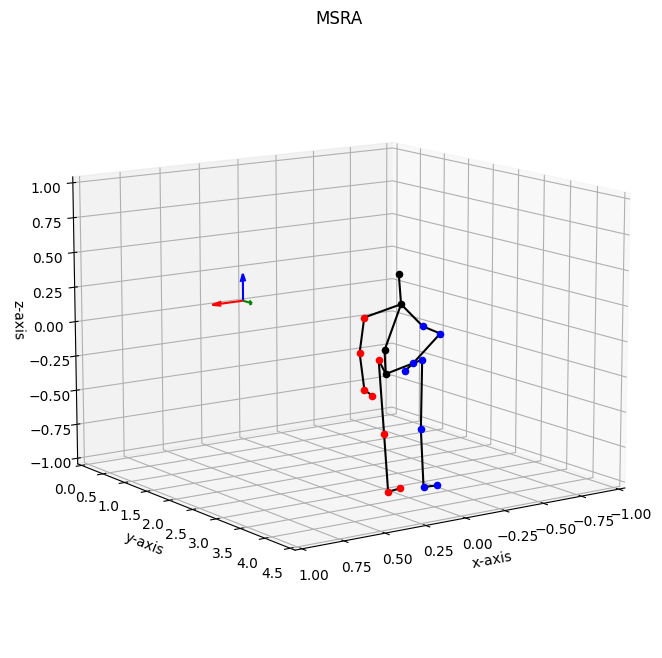

In [35]:
##viewing just one frame each

# %matplotlib notebook

frame_idx = 0
plt.ioff()
fig = plt.figure(figsize=(8,8))

elev= 12
azim = 55

ax = fig.add_subplot(projection='3d')
ax.view_init(elev,azim) #(elev = 위아래, azim = 좌우)
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([0, 4.5])
ax.set_zlim3d([-1, 1])

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.quiver(0,0,0,0.2,0,0, color='r') #x-axis , label = 'x'
ax.quiver(0,0,0,0,0.2,0, color='g') #y-axis , label = 'y'
ax.quiver(0,0,0,0,0,0.2, color='b') #z-axis , label = 'z'

for bone in bones_3d:
    start = bone[0]
    end = bone[1]

    col = 'black' if bone[2] == 0 else 'black' #red = right, black = left

    x = [(test[frame_idx][start*3]), (test[frame_idx][end*3])]
    y = [(test[frame_idx][start*3+1]), (test[frame_idx][end*3+1])]
    z = [(test[frame_idx][start*3+2]), (test[frame_idx][end*3+2])]

    ax.plot(x, y, z, c = col)

for i in range(20):
    if i in [0,4,7,9,11,13,15,17]: col = 'blue'
    elif i in [19,2,3,6]: col = 'black'
    else: col = 'red'
        
    x = test[frame_idx][i*3]
    y = test[frame_idx][i*3+1]
    z = test[frame_idx][i*3+2]

    ax.scatter3D(x, y, z, c = col) 

plt.title(dataset_name)
plt.show()